<a href="https://colab.research.google.com/github/datdinhstore99/abc/blob/master/Transfer_Learninghouseandman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#building a Small Model

In [20]:

!wget --no-check-certificate \
     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O ./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-05-20 02:49:45--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 2607:f8b0:4001:c23::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

./inception_v3_weig 100%[===================>]  83.84M   206MB/s    in 0.4s    

2020-05-20 02:49:46 (206 MB/s) - ‘./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
link = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
link1 = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"
link2 = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file ='./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
import os 

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (150,150,3),include_top = False,weights = None)
pre_trained_model.load_weights(local_weights_file)

In [23]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [25]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [0]:
last_layer = pre_trained_model.get_layer('mixed7')

In [0]:
last_output = last_layer.output

In [28]:
last_output #ma tran 4 chieu

<tf.Tensor 'mixed7_2/Identity:0' shape=(None, 7, 7, 768) dtype=float32>

In [0]:
from tensorflow.keras.optimizers import RMSprop

#Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
#Add a fully connected layer with 1,024 hidden units and ReLU Activation
x = layers.Dense(1024,activation='relu')(x)
#Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
#Add a final sigmoid layer for classification
x = layers.Dense(1,activation='sigmoid')(x)

model = Model(pre_trained_model.input,x)
model.compile(optimizer = RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [32]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

Setting Data 

In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-05-20 02:22:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   116MB/s    in 1.2s    

2020-05-20 02:22:17 (116 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [11]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-05-20 02:22:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 2607:f8b0:4001:c17::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  33.8MB/s    in 0.3s    

2020-05-20 02:22:30 (33.8 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [14]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse40-8.png', 'horse33-9.png', 'horse16-8.png', 'horse37-3.png', 'horse24-0.png', 'horse15-3.png', 'horse05-9.png', 'horse33-0.png', 'horse32-5.png', 'horse07-4.png']
['human09-04.png', 'human07-25.png', 'human05-26.png', 'human14-19.png', 'human07-30.png', 'human08-10.png', 'human03-23.png', 'human09-29.png', 'human06-24.png', 'human06-17.png']
['horse5-018.png', 'horse6-218.png', 'horse3-198.png', 'horse4-548.png', 'horse3-326.png', 'horse3-484.png', 'horse2-069.png', 'horse1-264.png', 'horse5-065.png', 'horse3-416.png']
['valhuman02-00.png', 'valhuman03-01.png', 'valhuman05-03.png', 'valhuman03-20.png', 'valhuman03-23.png', 'valhuman01-02.png', 'valhuman02-17.png', 'valhuman01-24.png', 'valhuman01-07.png', 'valhuman05-06.png']


In [16]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [0]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

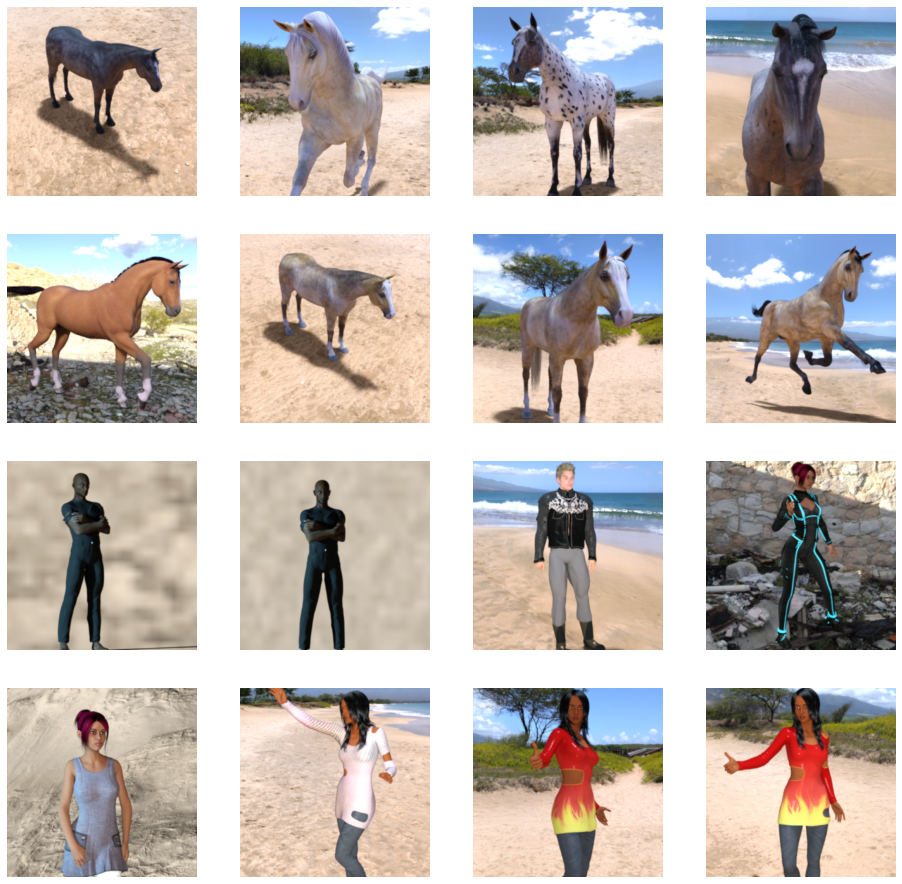

In [19]:
fig = plt.gcf()
fig.set_size_inches(ncols *4,nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir,fname)
               for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname)
               for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix+next_human_pix):
  #Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

#Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
#Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [40]:
history = model.fit_generator(train_generator,
                        validation_data = validation_generator,
                        steps_per_epoch = 8,
                        epochs = 10,
                        validation_steps = 8,
                        verbose = 1)



Epoch 1/10
8/8 [==============================] - 3s 341ms/step - loss: 0.0372 - acc: 0.9812 - val_loss: 0.0522 - val_acc: 0.9812
Epoch 2/10
8/8 [==============================] - 3s 332ms/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.0209 - val_acc: 0.9875
Epoch 3/10
8/8 [==============================] - 3s 330ms/step - loss: 0.0321 - acc: 0.9937 - val_loss: 0.3055 - val_acc: 0.9438
Epoch 4/10
8/8 [==============================] - 3s 334ms/step - loss: 0.0517 - acc: 0.9875 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 5/10
8/8 [==============================] - 3s 313ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.1092 - val_acc: 0.9750
Epoch 6/10
8/8 [==============================] - 3s 329ms/step - loss: 0.0787 - acc: 0.9625 - val_loss: 0.1671 - val_acc: 0.9563
Epoch 7/10
8/8 [==============================] - 3s 333ms/step - loss: 0.0057 - acc: 0.9937 - val_loss: 0.0154 - val_acc: 0.9937
Epoch 8/10
8/8 [==============================] - 3s 336ms/step - loss: 0.0072 - acc: 1.00

Running the model
ham chon anh tu file roi du doan anh can xet


Saving maxresdefault.jpg to maxresdefault.jpg
1.00


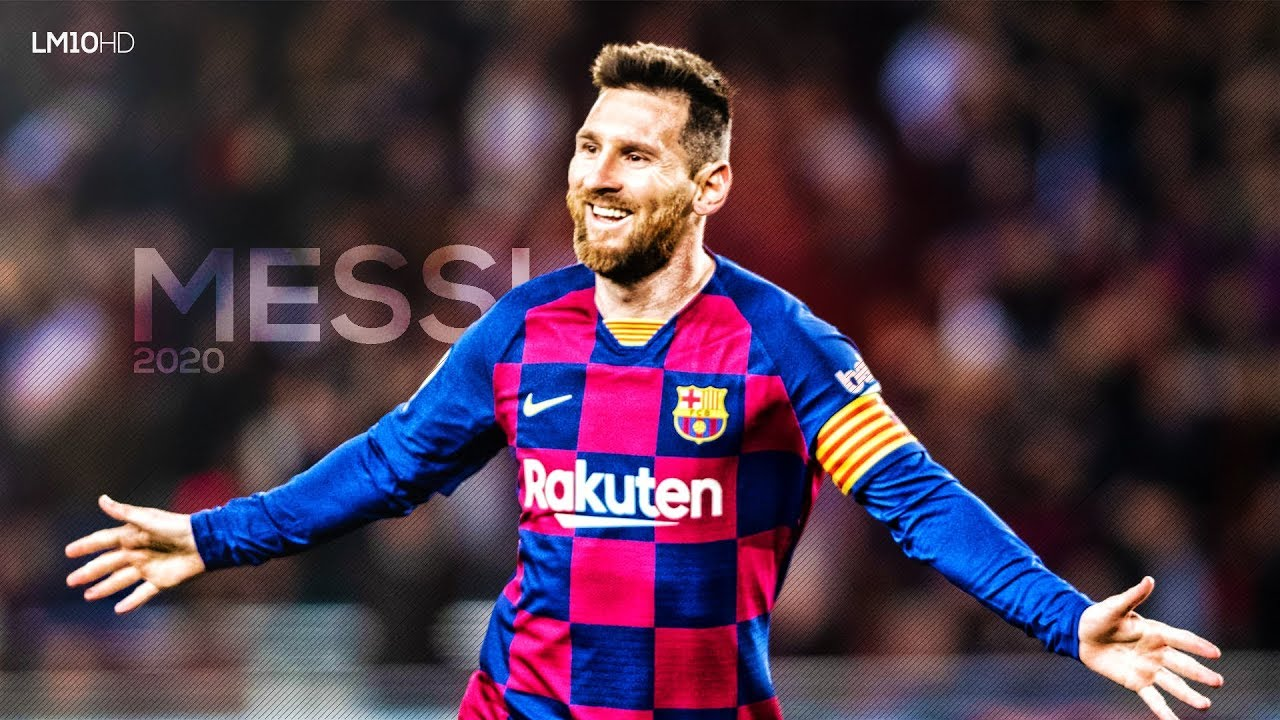

maxresdefault.jpg is a human


In [46]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  #predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)

  print("%.2f" % classes[0])
  
  from IPython.display import Image
  display(Image(filename=fn))
  
  if classes[0]>0.5:
    print(fn + " is a human")
    
  else:
    print(fn + " is a horse")


In [0]:
import tensorflow as tf

In [49]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


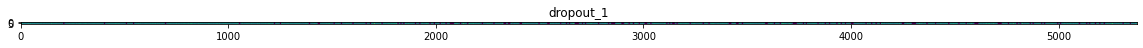

In [51]:
scale = 20. / n_features
plt.figure(figsize=(scale * n_features, scale))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')